In [ ]:
#install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving TAMO Historical Data.csv to TAMO Historical Data (1).csv


In [ ]:
df = pd.read_csv('TAMO Historical Data.csv')
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,09/29/2022,402.25,411.0,413.25,399.60,20.73M,0.79%
1,09/28/2022,399.10,394.9,406.60,392.85,18.11M,0.08%
2,09/27/2022,398.80,403.9,404.00,390.35,21.93M,0.33%
3,09/26/2022,397.50,416.0,417.90,393.15,33.23M,-6.05%
4,09/23/2022,423.10,431.9,431.90,420.55,13.44M,-2.11%


In [ ]:
df.shape

(329, 7)

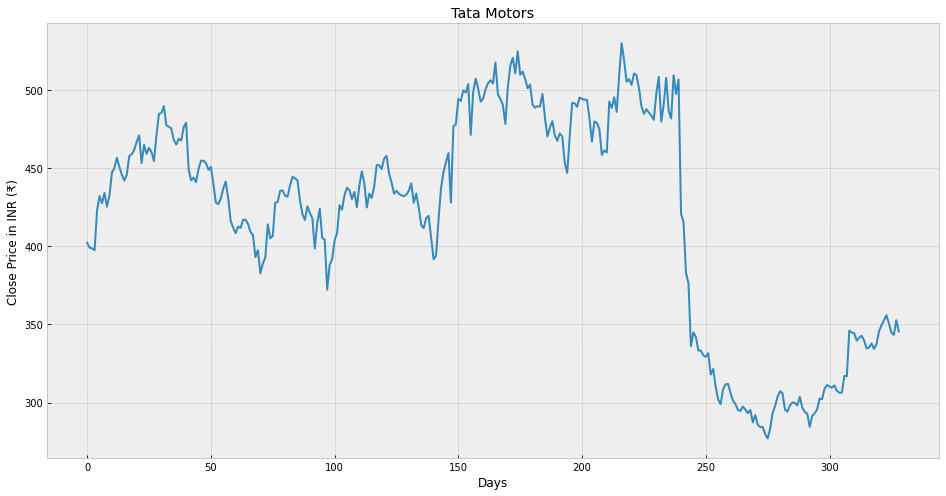

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Tata Motors')
plt.xlabel('Days')
plt.ylabel('Close Price in INR (₹)')
plt.plot(df['Price'])
plt.show()

In [ ]:
df = df[['Price']]
df.head(4)

,Price
0,402.25
1,399.10
2,398.80
3,397.50


In [ ]:
#hff
future_day = 25
#rhr
df['Prediction'] = df[['Price']].shift(-future_day)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price,Prediction
325,344.75,NaN
326,343.35,NaN
327,352.75,NaN
328,345.50,NaN


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-future_day]
print(X)

[[402.25]
 [399.1 ]
 [398.8 ]
 [397.5 ]
 [423.1 ]
 [432.2 ]
 [427.65]
 [434.25]
 [425.45]
 [432.5 ]
 [447.25]
 [450.2 ]
 [456.8 ]
 [451.  ]
 [445.9 ]
 [442.2 ]
 [445.85]
 [457.75]
 [459.  ]
 [461.75]
 [466.9 ]
 [471.1 ]
 [453.35]
 [465.05]
 [459.2 ]
 [463.2 ]
 [460.45]
 [454.6 ]
 [471.  ]
 [484.8 ]
 [485.4 ]
 [489.85]
 [477.55]
 [476.65]
 [475.55]
 [468.25]
 [465.25]
 [468.9 ]
 [467.8 ]
 [476.25]
 [479.2 ]
 [449.6 ]
 [442.25]
 [444.05]
 [441.15]
 [449.55]
 [454.9 ]
 [454.85]
 [453.45]
 [449.05]
 [450.9 ]
 [440.2 ]
 [428.05]
 [427.1 ]
 [430.55]
 [437.05]
 [441.55]
 [430.85]
 [416.35]
 [412.  ]
 [408.45]
 [412.7 ]
 [411.8 ]
 [416.95]
 [417.1 ]
 [414.5 ]
 [409.3 ]
 [407.2 ]
 [393.1 ]
 [397.6 ]
 [382.7 ]
 [388.95]
 [392.95]
 [414.1 ]
 [405.15]
 [406.7 ]
 [428.05]
 [428.5 ]
 [435.65]
 [435.85]
 [432.35]
 [431.9 ]
 [439.15]
 [444.6 ]
 [443.55]
 [442.4 ]
 [429.6 ]
 [420.65]
 [417.  ]
 [425.75]
 [421.45]
 [418.  ]
 [398.65]
 [415.15]
 [424.15]
 [405.35]
 [404.3 ]
 [372.3 ]
 [388.15]
 [391.75]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
y = np.array(df[ 'Prediction'])[:-future_day]
print(y)

[463.2  460.45 454.6  471.   484.8  485.4  489.85 477.55 476.65 475.55
 468.25 465.25 468.9  467.8  476.25 479.2  449.6  442.25 444.05 441.15
 449.55 454.9  454.85 453.45 449.05 450.9  440.2  428.05 427.1  430.55
 437.05 441.55 430.85 416.35 412.   408.45 412.7  411.8  416.95 417.1
 414.5  409.3  407.2  393.1  397.6  382.7  388.95 392.95 414.1  405.15
 406.7  428.05 428.5  435.65 435.85 432.35 431.9  439.15 444.6  443.55
 442.4  429.6  420.65 417.   425.75 421.45 418.   398.65 415.15 424.15
 405.35 404.3  372.3  388.15 391.75 403.95 408.55 426.3  423.5  432.85
 437.6  436.05 430.25 434.9  425.15 438.85 448.05 440.55 424.95 433.8
 431.05 438.3  452.05 452.05 449.5  456.15 458.05 446.75 441.15 433.75
 435.65 433.7  432.7  432.1  433.2  435.8  440.35 427.95 433.8  424.9
 413.65 411.7  418.15 419.6  405.9  391.75 394.   417.25 437.1  447.6
 454.05 459.75 427.95 477.   478.25 494.45 493.15 499.95 498.45 504.
 471.45 498.85 507.45 501.25 492.75 494.6  500.6  504.5  506.4  504.3
 517.75 497.3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [ ]:
x_future = df.drop(['Prediction'],1)[:-future_day]
x_future = x_future.tail(future_day)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[303.7 ],
       [307.25],
       [306.  ],
       [295.45],
       [294.2 ],
       [298.1 ],
       [300.05],
       [299.7 ],
       [298.15],
       [303.7 ],
       [296.85],
       [293.95],
       [292.9 ],
       [284.45],
       [291.4 ],
       [293.15],
       [295.55],
       [302.55],
       [302.15],
       [308.85],
       [311.25],
       [310.25],
       [309.55],
       [310.95],
       [307.45]])

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)


[324.55  306.35  317.1   319.275 334.65  344.9   344.25  339.6   341.55
 324.55  293.95  334.65  335.25  337.9   334.3   310.925 319.275 349.35
 307.25  355.95  352.75  344.75  343.35  352.75  345.5  ]

[337.38005617 339.66032188 338.85741142 332.08084713 331.27793667
 333.78301731 335.03555763 334.8107427  333.81513373 337.38005617
 332.98010685 331.11735458 330.44290979 325.01523507 329.47941724
 330.60349188 332.14507997 336.64137855 336.3844472  340.68804727
 342.22963536 341.58730699 341.13767713 342.03693685 339.78878756]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


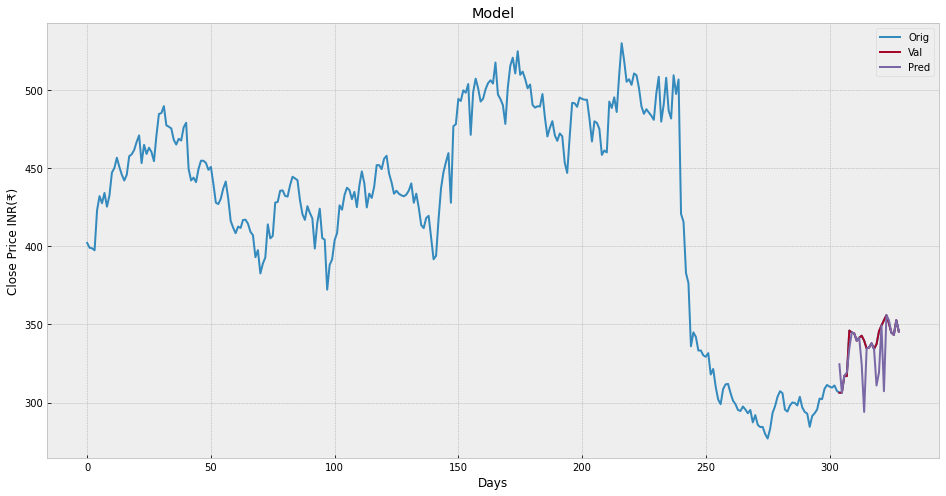

In [ ]:
prediction = tree_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR(₹)')
plt.plot(df['Price'])
plt.plot(valid[['Price', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


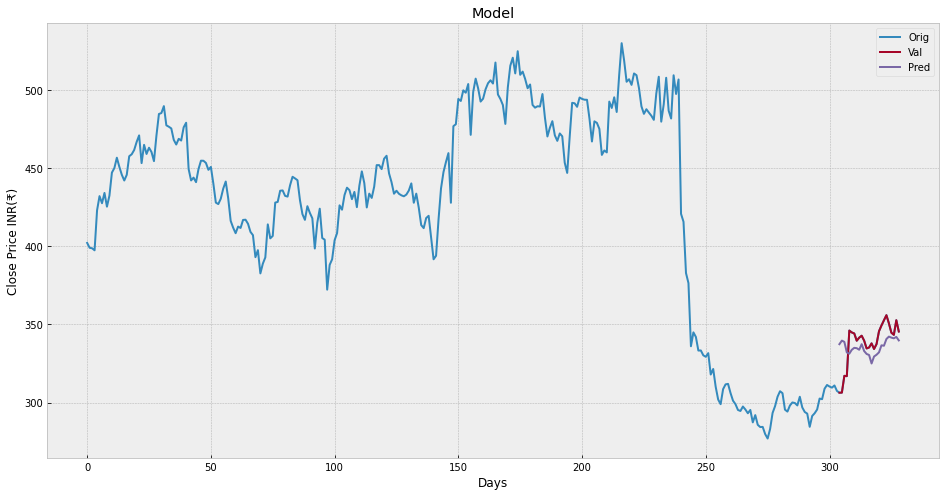

In [ ]:
prediction = lr_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR(₹)')
plt.plot(df['Price'])
plt.plot(valid[['Price', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()